# Regression: HOUSE PRICES PREDICTION

Abstract: The project aims to predict the final price of each home with around 80 features regarding every aspect of residential homes. 

The dataset is from the Kaggle website. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data There are two datasets in total. The training dataset has 1460 rows and 81 columns, including the target variable. The testing dataset has 1459 rows and 80 columns. The detailed description is shown in the file 'data_description.txt.' In this project, we will train the model on the training dataset using the best model and predict the target values for the testing dataset.

Here is a brief description of the features of the dataset: 

1. SalePrice: the property's sale price in dollars. (Target variable)
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RooMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

### Import Packages

In [1]:
import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import pylab as plt
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(30, 25))
# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (35, 30)
# Size of matplotlib histogram bins
bin_size = 10

# making results reproducible
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

###  Load Data

In [2]:
train_df = pd.read_csv('houseprice_train.csv')

In [3]:
test_df = pd.read_csv('houseprice_test.csv')

In [101]:
test_df_forPred = pd.read_csv('houseprice_test.csv')

### Data Cleansing

#### Data structure

First, we check the structure of the training and testing datasets.

In [5]:
print("Train set shape: {}".format(train_df.shape))

Train set shape: (1460, 81)


- The training set has 81 columns (80 features and target variable SalePrice) and 1460 instances.

In [6]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
print("Test set shape:: {}".format(test_df.shape))

Test set shape:: (1459, 80)


- The testing set has 80 columns and 1459 instances.

In [10]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Drop unused columns

In [12]:
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)

Since the column 'Id' is unique for each row, we drop it.

#### Separate categorical and numerical columns

In [13]:
# numeric
num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal']
#len(num_vars)
train_df[num_vars[0:14]].head()


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  
0             0         2  
1             1         2  
2             0         2  
3             0         1  
4             0         2

In [14]:
train_df[num_vars[14:]].head()

HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0

- We can get 38 numerical columns in the dataset from the data description.

In [15]:
# categorical
cat_vars = ['MSSubClass','MSZoning','Street','LandContour',
                  'Utilities','LotConfig','Neighborhood','Condition1','Condition2',
                  'BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle',
                  'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
                  'Heating','Electrical','GarageType','PavedDrive', 'GarageYrBlt',
                  'MoSold','YrSold','SaleType','MiscFeature','Alley']
# len(cat_vars)

In [16]:
train_df[cat_vars[0:14]].head()

MSSubClass MSZoning Street LandContour Utilities LotConfig Neighborhood  \
0          60       RL   Pave         Lvl    AllPub    Inside      CollgCr   
1          20       RL   Pave         Lvl    AllPub       FR2      Veenker   
2          60       RL   Pave         Lvl    AllPub    Inside      CollgCr   
3          70       RL   Pave         Lvl    AllPub    Corner      Crawfor   
4          60       RL   Pave         Lvl    AllPub       FR2      NoRidge   

  Condition1 Condition2 BldgType HouseStyle  YearBuilt  YearRemodAdd RoofStyle  
0       Norm       Norm     1Fam     2Story       2003          2003     Gable  
1      Feedr       Norm     1Fam     1Story       1976          1976     Gable  
2       Norm       Norm     1Fam     2Story       2001          2002     Gable  
3       Norm       Norm     1Fam     2Story       1915          1970     Gable  
4       Norm       Norm     1Fam     2Story       2000          2000     Gable

In [17]:
train_df[cat_vars[14:]].head()

RoofMatl Exterior1st Exterior2nd MasVnrType Foundation Heating Electrical  \
0  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA      SBrkr   
1  CompShg     MetalSd     MetalSd       None     CBlock    GasA      SBrkr   
2  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA      SBrkr   
3  CompShg     Wd Sdng     Wd Shng       None     BrkTil    GasA      SBrkr   
4  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA      SBrkr   

  GarageType PavedDrive  GarageYrBlt  MoSold  YrSold SaleType MiscFeature  \
0     Attchd          Y       2003.0       2    2008       WD         NaN   
1     Attchd          Y       1976.0       5    2007       WD         NaN   
2     Attchd          Y       2001.0       9    2008       WD         NaN   
3     Detchd          Y       1998.0       2    2006       WD         NaN   
4     Attchd          Y       2000.0      12    2008       WD         NaN   

  Alley  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

- We can get 29 numerical columns in the dataset from the data description.

In [18]:
# ordinal
ord_vars = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual',
            'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','HeatingQC','KitchenQual','Functional',
            'GarageFinish', 'SaleCondition','GarageQual','GarageCond','PoolQC', 
            'Fence', 'FireplaceQu']
# len(ord_vars)

In [19]:
train_df[ord_vars].head()

LotShape LandSlope  OverallQual  OverallCond ExterQual ExterCond BsmtQual  \
0      Reg       Gtl            7            5        Gd        TA       Gd   
1      Reg       Gtl            6            8        TA        TA       Gd   
2      IR1       Gtl            7            5        Gd        TA       Gd   
3      IR1       Gtl            7            5        TA        TA       TA   
4      IR1       Gtl            8            5        Gd        TA       Gd   

  BsmtCond BsmtExposure BsmtFinType1  ... HeatingQC KitchenQual Functional  \
0       TA           No          GLQ  ...        Ex          Gd        Typ   
1       TA           Gd          ALQ  ...        Ex          TA        Typ   
2       TA           Mn          GLQ  ...        Ex          Gd        Typ   
3       Gd           No          ALQ  ...        Gd          Gd        Typ   
4       TA           Av          GLQ  ...        Ex          Gd        Typ   

  GarageFinish SaleCondition GarageQual GarageCond PoolQC Fence FireplaceQu  
0          RFn        Normal         TA         TA    NaN   NaN         NaN  
1          RFn        Normal         TA         TA    NaN   NaN          TA  
2          RFn        Normal         TA         TA    NaN   NaN          TA  
3          Unf       Abnorml         TA         TA    NaN   NaN          Gd  
4          RFn        Normal         TA         TA    NaN   NaN          TA  

[5 rows x 21 columns]

- We can get 21 ordinal columns in the dataset from the data description.

In [20]:
# binary
bin_vars = ['CentralAir']
#len(bin_vars)

In [21]:
train_df[bin_vars].head()

CentralAir
0          Y
1          Y
2          Y
3          Y
4          Y

- We can get 1 binary column in the dataset from the data description.

#### Find the missing values 

In [22]:
ms = round(train_df.isna().sum().sum()/train_df.count().sum()*100, 4)
print('Percentage of missing values (train set): {}'.format(ms),'%')

Percentage of missing values (train set): 6.3413 %


There are 6.3413% missing values in the training dataset.

In [23]:
ms = round(test_df.isna().sum().sum()/test_df.count().sum()*100, 4)
print('Percentage of missing values (test set): {}'.format(ms),'%')

Percentage of missing values (test set): 6.4659 %


There are 6.4659% missing values in the testing dataset.

In [24]:
ms_ta = train_df['SalePrice'].isnull().sum()
print('Missing values of the target variable(train set): {}'.format(ms_ta))

Missing values of the target variable(train set): 0


The target variable 'SalePrice' in the training set has no missing value.

In [25]:
ms_num = train_df[num_vars].isnull().sum().sort_values(ascending=False)/len(train_df[num_vars])
print('Missing values of the numerical variables (train_df): \n{}'.format(ms_num))

Missing values of the numerical variables (train_df): 
LotFrontage      0.177397
MasVnrArea       0.005479
PoolArea         0.000000
LotArea          0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
MiscVal          0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
FullBath         0.000000
dtype: float64


In [26]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
# train_df['LotFrontage'].isna().sum()
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)
# train_df['MasVnrArea'].isna().sum()

For the training set, the table shows that the numerical columns 'LotFrontage' and 'MasVnrArea' have missing values, so we replace NaNs using the Median of those columns.

In [27]:
ms_num = test_df[num_vars].isnull().sum().sort_values(ascending=False)/len(test_df[num_vars])
print('Missing values of the numerical variables (test_df): \n{}'.format(ms_num))

Missing values of the numerical variables (test_df): 
LotFrontage      0.155586
MasVnrArea       0.010281
BsmtHalfBath     0.001371
BsmtFullBath     0.001371
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
GarageArea       0.000685
GarageCars       0.000685
TotalBsmtSF      0.000685
LotArea          0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
MiscVal          0.000000
PoolArea         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
FullBath         0.000000
dtype: float64


In [28]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(), inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(), inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].median(), inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median(), inplace=True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median(), inplace=True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median(), inplace=True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median(), inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].median(), inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].median(), inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median(), inplace=True)

For the testing set, the table shows that the numerical columns 'LotFrontage' and 'MasVnrArea' , 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'GarageCars', and 'TotalBsmtSF' have missing values, so I decide to replace NaNs using the Median of those columns.

In [29]:
ms_cat = train_df[cat_vars].isnull().sum().sort_values(ascending=False)/len(train_df[cat_vars])
print('Missing values of the categorical variables (train_df): \n{}'.format(ms_cat))

Missing values of the categorical variables (train_df): 
MiscFeature     0.963014
Alley           0.937671
GarageYrBlt     0.055479
GarageType      0.055479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
LandContour     0.000000
YearBuilt       0.000000
LotConfig       0.000000
Neighborhood    0.000000
Street          0.000000
Condition1      0.000000
Condition2      0.000000
MSZoning        0.000000
BldgType        0.000000
HouseStyle      0.000000
RoofMatl        0.000000
YearRemodAdd    0.000000
RoofStyle       0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
Foundation      0.000000
Heating         0.000000
PavedDrive      0.000000
MoSold          0.000000
YrSold          0.000000
SaleType        0.000000
MSSubClass      0.000000
dtype: float64


For the training set, the table shows that the categorical columns 'MiscFeature', 'Alley', 'GarageType' and 'MasVnrType' and 'Electrical' have missing values.

In [30]:
train_df = train_df.drop(['MiscFeature', 'Alley'], axis=1)
cat_vars = cat_vars[:-2]

We drop the categorical columns 'MiscFeature' and 'Alley' since they have over 45% missing values.

In [31]:
## 'GarageType'
train_df['GarageType'].replace(np.nan, 'NA', inplace = True)
## 'MasVnrType' 
train_df['MasVnrType'].replace(np.nan, 'NA', inplace = True)

We replace the missing values with the object 'NA' because the NA values in the categorical columns 'GarageType' and 'MasVnrType' mean a missing of that specific object. For instance, the NA values in GarageType means there is no garage in that house.

In [32]:
## 'Electrical'
# X_train['Electrical'].unique()
train_df[train_df['Electrical'].isnull()]['Electrical'].head()

1379    NaN
Name: Electrical, dtype: object

In [33]:
train_df = train_df[train_df.index != 1379]

Since the categorical column 'Electrical' only has one missing value of index 1379, we decide to drop that row.

In [34]:
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
# train_df['GarageYrBlt'].isna().sum()

We replace NaNs in the column 'GarageYrBlt' using the Median of it.

In [35]:
ms_cat = test_df[cat_vars].isnull().sum().sort_values(ascending=False)/len(test_df[cat_vars])
print('Missing values of the categorical variables (test_df): \n{}'.format(ms_cat))

Missing values of the categorical variables (test_df): 
GarageYrBlt     0.053461
GarageType      0.052090
MasVnrType      0.010966
MSZoning        0.002742
Utilities       0.001371
SaleType        0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
HouseStyle      0.000000
Street          0.000000
LandContour     0.000000
LotConfig       0.000000
Neighborhood    0.000000
Condition1      0.000000
Condition2      0.000000
BldgType        0.000000
RoofStyle       0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
YrSold          0.000000
RoofMatl        0.000000
Foundation      0.000000
Heating         0.000000
Electrical      0.000000
PavedDrive      0.000000
MoSold          0.000000
MSSubClass      0.000000
dtype: float64


For the trsting set, the table shows that the categorical columns 'GarageYrBlt', 'GarageType', 'MasVnrType' and 'MSZoning', 'Utilities',  'SaleType', 'Exterior2nd', and 'Exterior1st' have missing values.

In [36]:
test_df['GarageType'].replace(np.nan, 'NA', inplace = True)
test_df['MasVnrType'].replace(np.nan, 'NA', inplace = True)
test_df['MSZoning'].replace(np.nan, 'NA', inplace = True)
test_df['Utilities'].replace(np.nan, 'NA', inplace = True)
test_df['SaleType'].replace(np.nan, 'NA', inplace = True)
test_df['Exterior2nd'].replace(np.nan, 'NA', inplace = True)
test_df['Exterior1st'].replace(np.nan, 'NA', inplace = True)
test_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)

We replace the missing values with the object 'NA' because the NA values in the categorical columns 'GarageYrBlt', 'GarageType', 'MasVnrType' and 'MSZoning', 'Utilities',  'SaleType', 'Exterior2nd', and 'Exterior1st' mean a missing of that specific object. Besides, We replace NaNs in the column 'GarageYrBlt' using the Median of it.

In [37]:
test_df = test_df.drop(['MiscFeature', 'Alley'], axis=1)

Since the ordinal columns 'MiscFeature' and 'Alley' are removed in the training set, these two columns are also removed in the testing set.

In [38]:
ms_ord = train_df[ord_vars].isnull().sum().sort_values(ascending=False)/len(train_df[ord_vars])
print('Missing values of the ordinal variables (train_set): \n{}'.format(ms_ord))

Missing values of the ordinal variables (train_set): 
PoolQC           0.995202
Fence            0.807402
FireplaceQu      0.472241
GarageCond       0.055517
GarageQual       0.055517
GarageFinish     0.055517
BsmtExposure     0.026045
BsmtFinType2     0.026045
BsmtFinType1     0.025360
BsmtCond         0.025360
BsmtQual         0.025360
KitchenQual      0.000000
HeatingQC        0.000000
Functional       0.000000
SaleCondition    0.000000
ExterCond        0.000000
ExterQual        0.000000
OverallCond      0.000000
OverallQual      0.000000
LandSlope        0.000000
LotShape         0.000000
dtype: float64


For the training set, the table shows that the ordinal columns 'PoolQC', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual' have missing values. 

In [39]:
train_df = train_df.drop(['PoolQC', 'Fence', 'FireplaceQu'], axis=1)
ord_vars = ord_vars[:-3]

Since the ordinal columns 'PoolQC' and 'Fence' and 'FireplaceQu' have over 45% missing values, I decide to drop those columns.

In [40]:
## 'GarageCond'
train_df['GarageCond'].replace(np.nan, 'NA', inplace = True)
## 'GarageQual'
train_df['GarageQual'].replace(np.nan, 'NA', inplace = True)
## 'GarageFinish'
train_df['GarageFinish'].replace(np.nan, 'NA', inplace = True)
## 'BsmtExposure'
train_df['BsmtExposure'].replace(np.nan, 'NA', inplace = True)
## 'BsmtFinType2'
train_df['BsmtFinType2'].replace(np.nan, 'NA', inplace = True)
## 'BsmtFinType1'
train_df['BsmtFinType1'].replace(np.nan, 'NA', inplace = True)
## 'BsmtCond'
train_df['BsmtCond'].replace(np.nan, 'NA', inplace = True)
## 'BsmtQual'
train_df['BsmtQual'].replace(np.nan, 'NA', inplace = True)

The ordinal columns 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual' have missing values. However, We replace the missing values with the object 'NA' in these columns because the NA values in these columns mean a missing of that specific object.

In [41]:
ms_ord = test_df[ord_vars].isnull().sum().sort_values(ascending=False)/len(test_df[ord_vars])
print('Missing values of the ordinal variables (test_df): \n{}'.format(ms_ord))

Missing values of the ordinal variables (test_df): 
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
Functional       0.001371
KitchenQual      0.000685
HeatingQC        0.000000
SaleCondition    0.000000
ExterCond        0.000000
ExterQual        0.000000
OverallCond      0.000000
OverallQual      0.000000
LandSlope        0.000000
LotShape         0.000000
dtype: float64


For the testing set, The table shows that the ordinal columns 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'Functional', and 'KitchenQual' have missing values.

In [42]:
test_df = test_df.drop(['PoolQC', 'Fence', 'FireplaceQu'], axis=1)

Since the ordinal columns 'PoolQC' and 'Fence' and 'FireplaceQu' are removed in the training set, we also remove these three columns in the testing set.

In [43]:
test_df['GarageCond'].replace(np.nan, 'NA', inplace = True)
test_df['GarageQual'].replace(np.nan, 'NA', inplace = True)
test_df['GarageFinish'].replace(np.nan, 'NA', inplace = True)
test_df['BsmtFinType2'].replace(np.nan, 'NA', inplace = True)
test_df['BsmtFinType1'].replace(np.nan, 'NA', inplace = True)
test_df['BsmtCond'].replace(np.nan, 'NA', inplace = True)
test_df['BsmtQual'].replace(np.nan, 'NA', inplace = True)
test_df['BsmtExposure'].replace(np.nan, 'NA', inplace = True)
test_df['Functional'].replace(np.nan, 'NA', inplace = True)
test_df['KitchenQual'].replace(np.nan, 'NA', inplace = True)

The ordinal columns 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'Functional', and 'KitchenQual' have missing values. However, We replace the missing values with the object 'NA' in these columns because the NA values in these columns mean a missing of that specific object.

In [44]:
print("New train set shape: {}".format(train_df.shape))

New train set shape: (1459, 75)


The updated training dataset has 1459 instances, 74 features and 1 target variable.

In [45]:
print("New test set shape: {}".format(test_df.shape))

New test set shape: (1459, 74)


The updated testing dataset has 1459 instances, 74 features.

#### Data Leakage

After imputing the missing values, we check if there is a data leakage problem in the dataset. Since there is no 100% correlation, we assume there is no data leakage.

In [46]:
train_df.corr()['SalePrice']

MSSubClass      -0.084230
LotFrontage      0.334793
LotArea          0.263837
OverallQual      0.791069
OverallCond     -0.077924
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
BsmtFinSF1       0.386436
BsmtFinSF2      -0.011412
BsmtUnfSF        0.214446
TotalBsmtSF      0.613905
1stFlrSF         0.605968
2ndFlrSF         0.319464
LowQualFinSF    -0.025620
GrLivArea        0.708618
BsmtFullBath     0.227082
BsmtHalfBath    -0.016873
FullBath         0.560881
HalfBath         0.284400
BedroomAbvGr     0.168235
KitchenAbvGr    -0.135935
TotRmsAbvGrd     0.533779
Fireplaces       0.466968
GarageYrBlt      0.467120
GarageCars       0.640473
GarageArea       0.623423
WoodDeckSF       0.324422
OpenPorchSF      0.315831
EnclosedPorch   -0.128627
3SsnPorch        0.044571
ScreenPorch      0.111419
PoolArea         0.092397
MiscVal         -0.021200
MoSold           0.046380
YrSold          -0.028907
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Exploratory Data Analysis

#### Visualizing numerical distributions

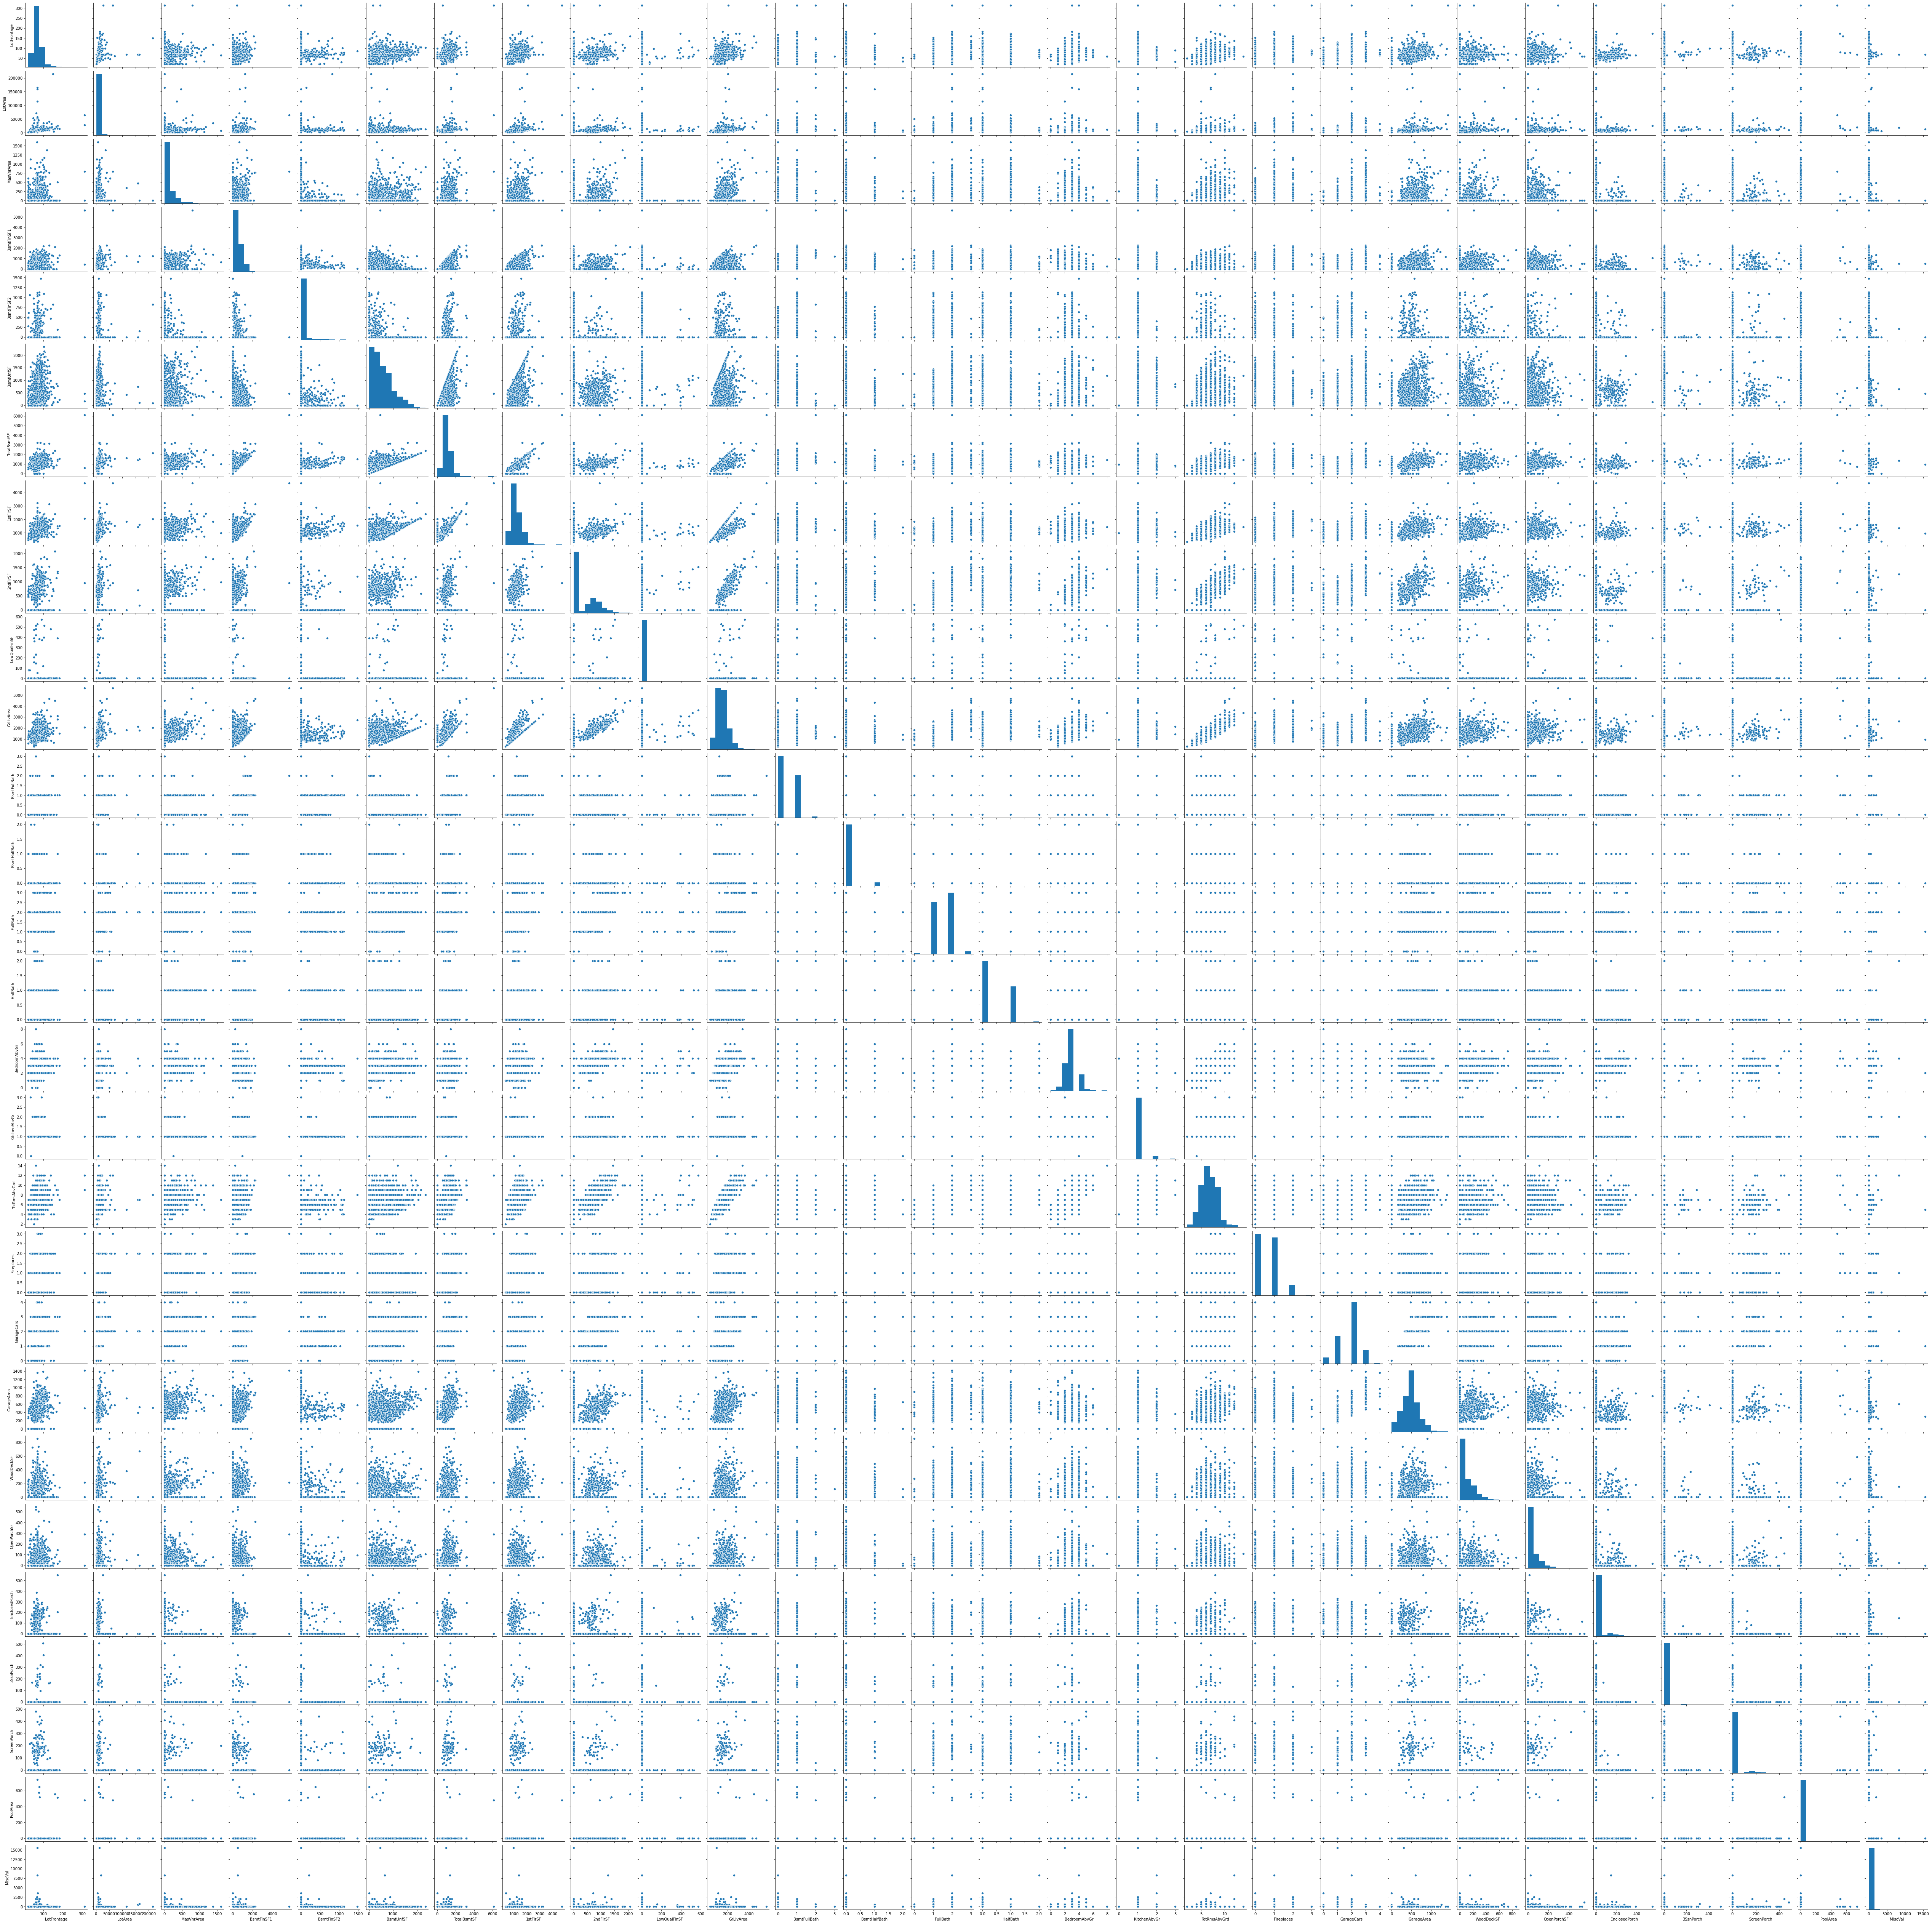

In [47]:
sns.pairplot(train_df[num_vars])
plt.show()

# pd.plotting.scatter_matrix(X_train[num_vars],
#               figsize = (15,15), c = y_train, alpha = 0.8, marker = 'O')

This pair plot is an overview of numerical variables distribution. It seems like most numerical variables are right-skewed; however, since we are dealing with Machine Learning and the dataset is large, this will not be a problem.

#### Visualizing categorical variables

In [48]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (4, 3)

# plt.xticks(rotation=0)

# Plot MSSubClass counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['MSSubClass'].value_counts().plot(kind='bar', 
                                         title='MSSubClass Counts')
# Plot MSZoning counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['MSZoning'].value_counts().plot(kind='bar', 
                                       title='MSZoning Counts')
# Plot Street counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['Street'].value_counts().plot(kind='bar', 
                                    title='Street Counts')
# Plot LandContour counts
plt.subplot2grid(fig_dims, (1, 1))
train_df['LandContour'].value_counts().plot(kind='bar', 
                                         title='LandContour Counts')
# Plot Utilities counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['Utilities'].value_counts().plot(kind='bar', 
                                         title='Utilities Counts')
# Plot LotConfig counts
plt.subplot2grid(fig_dims, (2, 1))
train_df['LotConfig'].value_counts().plot(kind='bar', 
                                       title='LotConfig Counts')
# Plot Condition1 counts
plt.subplot2grid(fig_dims, (3, 0))
train_df['Condition1'].value_counts().plot(kind='bar', 
                                         title='Condition1 Counts')
# Plot Condition2 counts
plt.subplot2grid(fig_dims, (3, 1))
train_df['Condition2'].value_counts().plot(kind='bar', 
                                         title='Condition2 Counts')


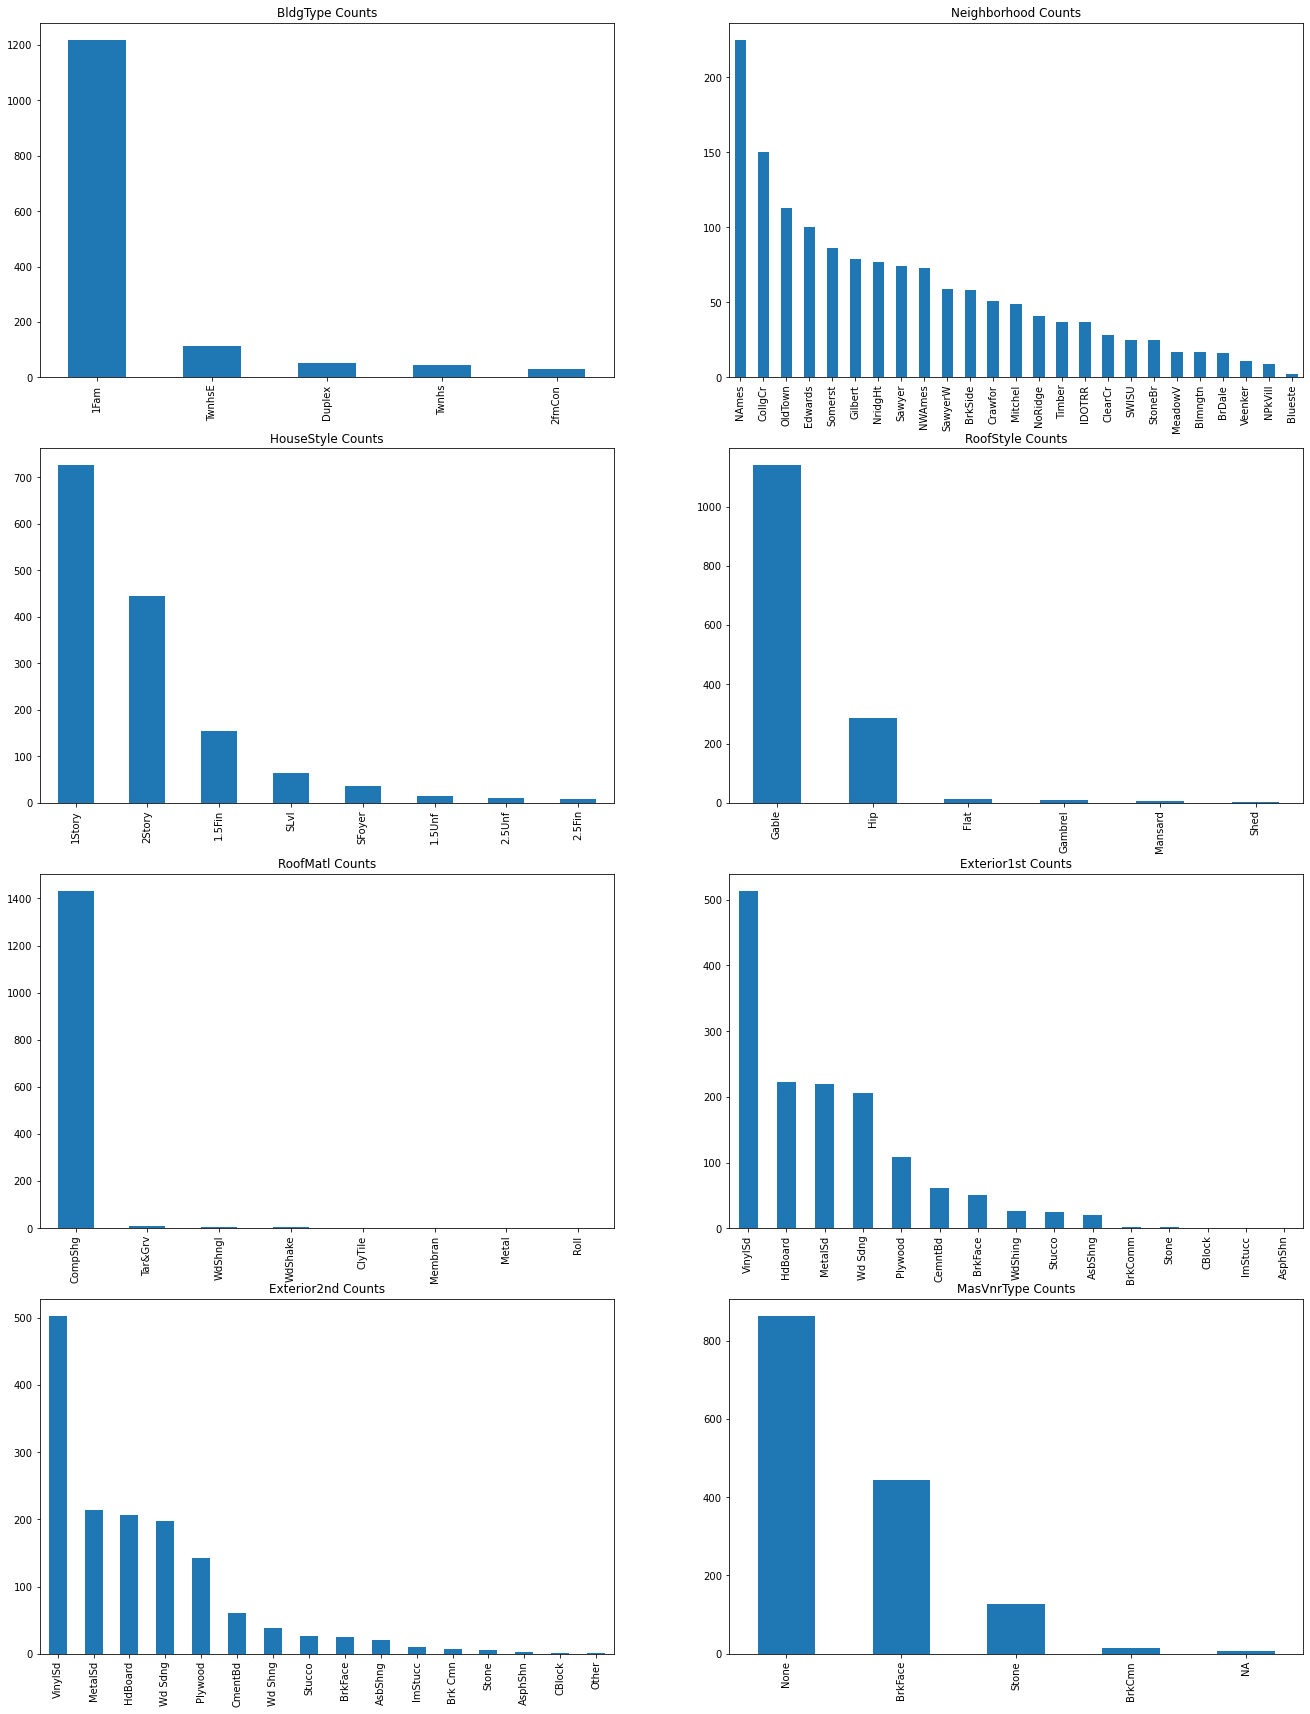

In [49]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (4, 3)

# plt.xticks(rotation=0)

# Plot BldgType counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['BldgType'].value_counts().plot(kind='bar', 
                                       title='BldgType Counts')

# Plot Neighborhood counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['Neighborhood'].value_counts().plot(kind='bar', 
                                    title='Neighborhood Counts')

# Plot HouseStyle counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['HouseStyle'].value_counts().plot(kind='bar', 
                                       title='HouseStyle Counts')
# Plot RoofStyle counts
plt.subplot2grid(fig_dims, (1, 1))
train_df['RoofStyle'].value_counts().plot(kind='bar', 
                                         title='RoofStyle Counts')
# Plot RoofMatl counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['RoofMatl'].value_counts().plot(kind='bar', 
                                       title='RoofMatl Counts')
# Plot Exterior1st counts
plt.subplot2grid(fig_dims, (2, 1))
train_df['Exterior1st'].value_counts().plot(kind='bar', 
                                       title='Exterior1st Counts')
# Plot Exterior2nd counts
plt.subplot2grid(fig_dims, (3, 0))
train_df['Exterior2nd'].value_counts().plot(kind='bar', 
                                    title='Exterior2nd Counts')
# Plot MasVnrType counts
plt.subplot2grid(fig_dims, (3, 1))
train_df['MasVnrType'].value_counts().plot(kind='bar', 
                                         title='MasVnrType Counts')



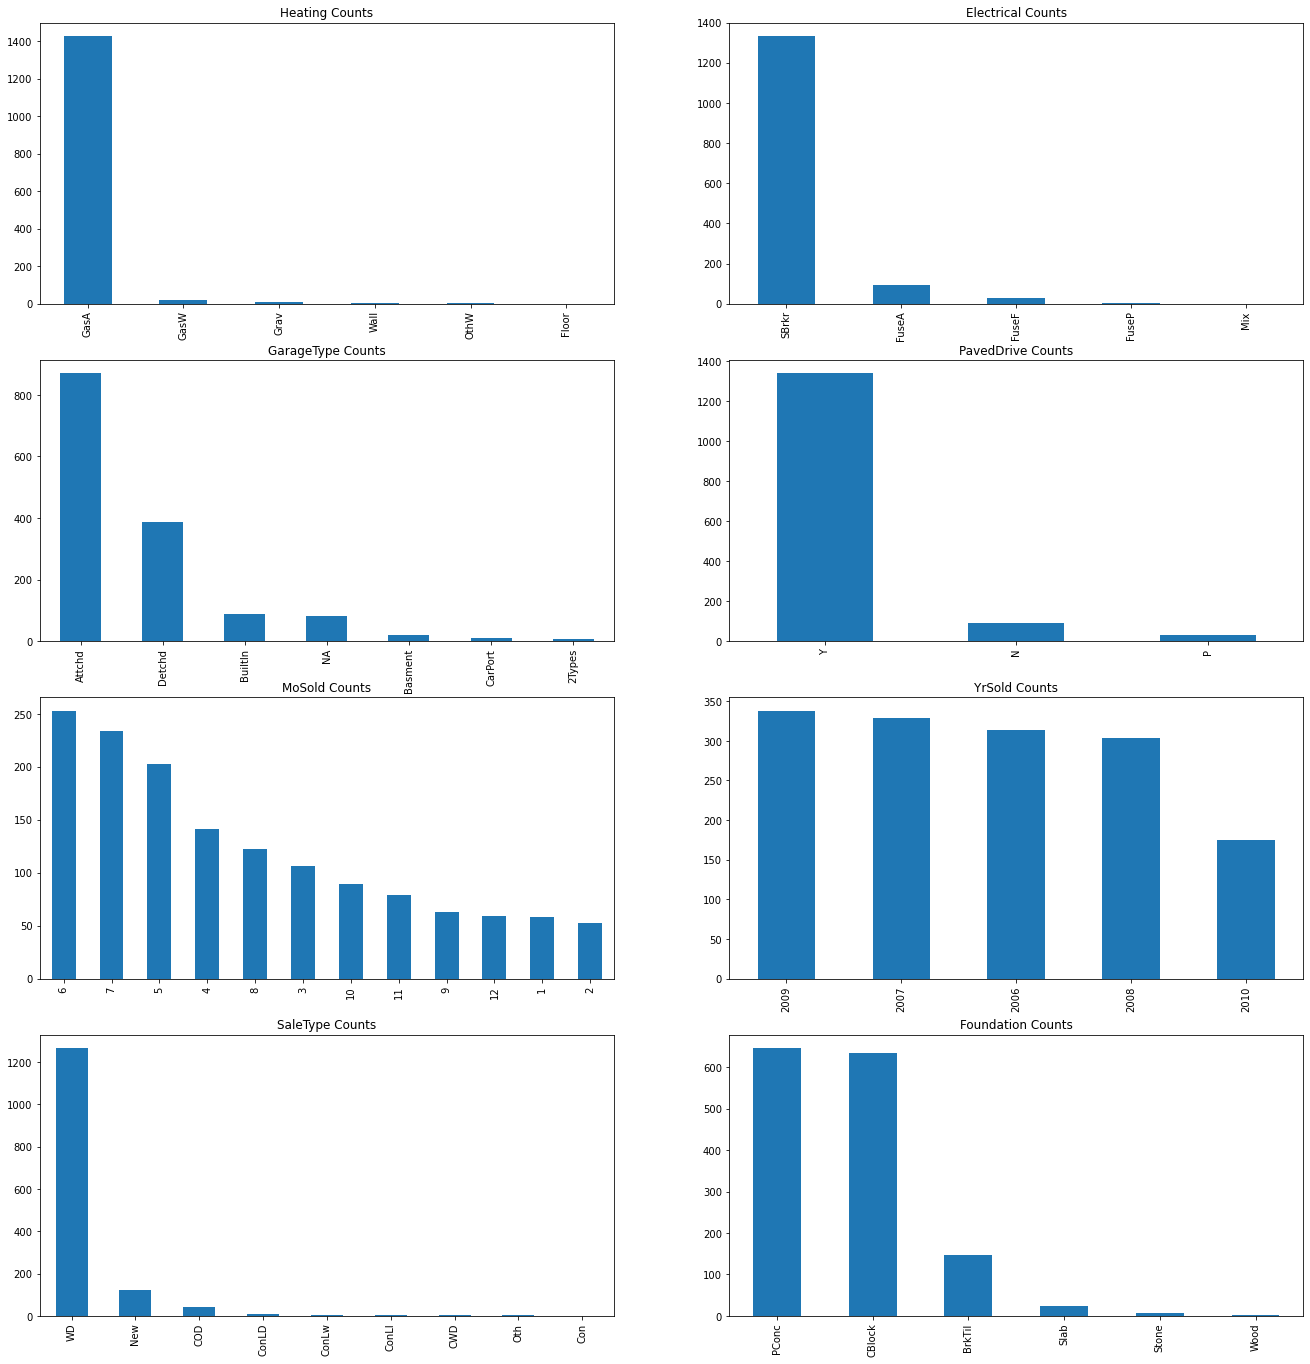

In [50]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (5, 3)

# plt.xticks(rotation=0)

# Plot Heating counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['Heating'].value_counts().plot(kind='bar', 
                                       title='Heating Counts')
# Plot Electrical counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['Electrical'].value_counts().plot(kind='bar', 
                                    title='Electrical Counts')
# Plot GarageType counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['GarageType'].value_counts().plot(kind='bar', 
                                         title='GarageType Counts')
# Plot PavedDrive counts
plt.subplot2grid(fig_dims, (1, 1))
train_df['PavedDrive'].value_counts().plot(kind='bar', 
                                         title='PavedDrive Counts')
# Plot MoSold counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['MoSold'].value_counts().plot(kind='bar', 
                                       title='MoSold Counts')
# Plot YrSold counts
plt.subplot2grid(fig_dims, (2, 1))
train_df['YrSold'].value_counts().plot(kind='bar', 
                                       title='YrSold Counts')
# Plot SaleType counts
plt.subplot2grid(fig_dims, (3, 0))
train_df['SaleType'].value_counts().plot(kind='bar', 
                                    title='SaleType Counts')

# Plot Foundation counts
plt.subplot2grid(fig_dims, (3, 1))
train_df['Foundation'].value_counts().plot(kind='bar', 
                                         title='Foundation Counts')

In [51]:
train_df = train_df.drop(['Street', 'Utilities', 'Condition1', 'Condition2', 
                          'RoofMatl', 'Heating', 'SaleType', 'MSSubClass',
                         'Neighborhood', 'Electrical','Exterior1st', 'Exterior2nd', 'PavedDrive'], axis=1)

In [52]:
test_df = test_df.drop(['Street', 'Utilities', 'Condition1', 'Condition2', 
                          'RoofMatl', 'Heating', 'SaleType', 'MSSubClass',
                         'Neighborhood', 'Electrical','Exterior1st', 'Exterior2nd', 'PavedDrive'], axis=1)

In [53]:
cat_vars.remove('Street')
cat_vars.remove('Utilities')
cat_vars.remove('Condition1')
cat_vars.remove('Condition2')
cat_vars.remove('RoofMatl')
cat_vars.remove('Heating')
cat_vars.remove('SaleType')
cat_vars.remove('MSSubClass')
cat_vars.remove('PavedDrive')
cat_vars.remove('Neighborhood')
cat_vars.remove('Electrical')
cat_vars.remove('Exterior1st')
cat_vars.remove('Exterior2nd')

These bar plots show that some columns, such as 'Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'PavedDrive', and 'SaleType' get a large proportion of a single value. Besides, the column 'MSSubClass', 'Neighborhood', 'Electrical','Exterior1st', and 'Exterior2nd' has too many unique values. Therefore, we drop those columns to simplify the model. 

In [54]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot GarageYrBlt counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['GarageYrBlt'].value_counts().plot(kind='bar', 
                                       title='GarageYrBlt Counts')

# Plot YearBuilt counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['YearBuilt'].value_counts().plot(kind='bar', 
                                    title='YearBuilt Counts')

# Plot YearRemodAdd counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['YearRemodAdd'].value_counts().plot(kind='bar', 
                                         title='YearRemodAdd Counts')

In [55]:
train_df = train_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1)
test_df = test_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1)

In [56]:
cat_vars.remove('YearBuilt')
cat_vars.remove('YearRemodAdd')
cat_vars.remove('GarageYrBlt')

Since this is not a time series analysis, we remove the columns 'YearBuilt', 'YearRemodAdd', and 'GarageYrBlt' to simplify the model.

#### Visualizing ordinal variables

In [57]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (5, 2)

# plt.xticks(rotation=0)

# Plot LotShape counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['LotShape'].value_counts().plot(kind='bar', 
                                       title='LotShape Counts')
# Plot LandSlope counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['LandSlope'].value_counts().plot(kind='bar', 
                                    title='LandSlope Counts')
# Plot OverallQual counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['OverallQual'].value_counts().plot(kind='bar', 
                                         title='OverallQual Counts')
# Plot OverallCond counts
plt.subplot2grid(fig_dims, (1, 1))
train_df['OverallCond'].value_counts().plot(kind='bar', 
                                         title='OverallCond Counts')
# Plot ExterQual counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['ExterQual'].value_counts().plot(kind='bar', 
                                       title='ExterQual Counts')
# Plot ExterCond counts
plt.subplot2grid(fig_dims, (2, 1))
train_df['ExterCond'].value_counts().plot(kind='bar', 
                                       title='ExterCond Counts')
# Plot BsmtQual counts
plt.subplot2grid(fig_dims, (3, 0))
train_df['BsmtQual'].value_counts().plot(kind='bar', 
                                    title='BsmtQual Counts')
# Plot BsmtCond counts
plt.subplot2grid(fig_dims, (3, 1))
train_df['BsmtCond'].value_counts().plot(kind='bar', 
                                         title='BsmtCond Counts')
# Plot BsmtExposure counts
plt.subplot2grid(fig_dims, (4, 0))
train_df['BsmtExposure'].value_counts().plot(kind='bar', 
                                         title='BsmtExposure Counts')
# Plot BsmtFinType1 counts
plt.subplot2grid(fig_dims, (4, 1))
train_df['BsmtFinType1'].value_counts().plot(kind='bar', 
                                       title='BsmtFinType1 Counts')


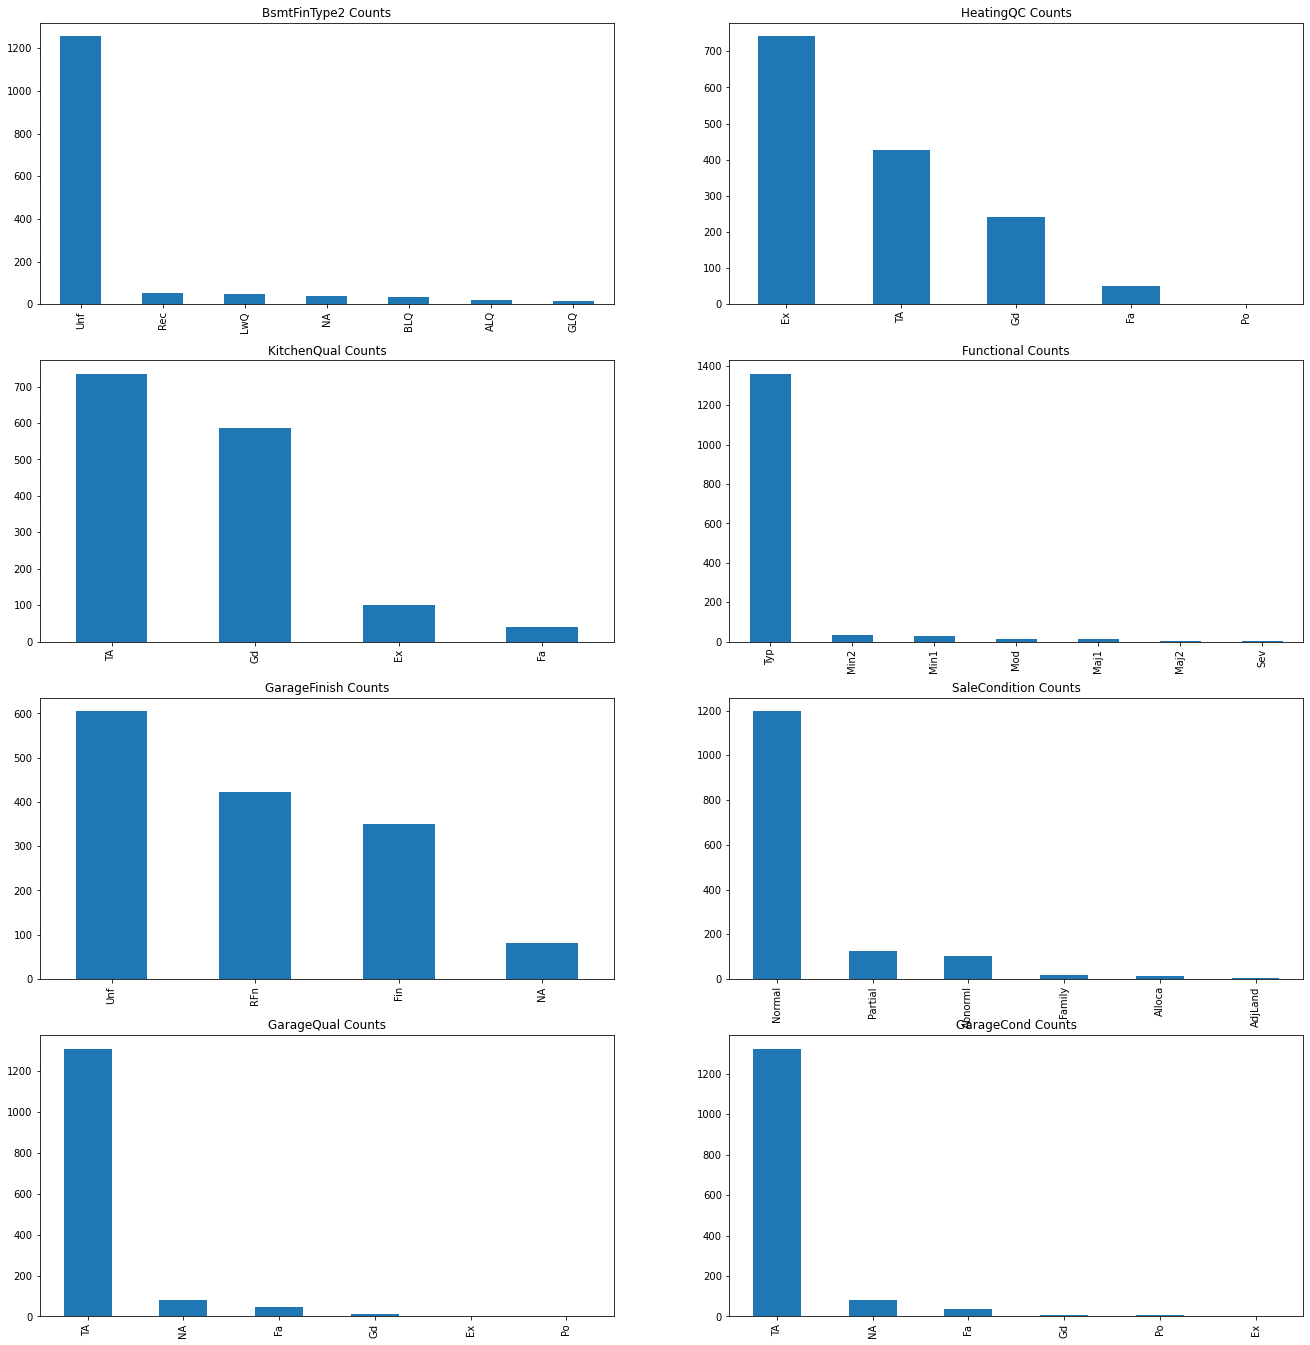

In [58]:
# Set up a grid of plots
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (5, 3)

# plt.xticks(rotation=0)

# Plot BsmtFinType2 counts
plt.subplot2grid(fig_dims, (0, 0))
train_df['BsmtFinType2'].value_counts().plot(kind='bar', 
                                       title='BsmtFinType2 Counts')
# Plot HeatingQC counts
plt.subplot2grid(fig_dims, (0, 1))
train_df['HeatingQC'].value_counts().plot(kind='bar', 
                                    title='HeatingQC Counts')
# Plot KitchenQual counts
plt.subplot2grid(fig_dims, (1, 0))
train_df['KitchenQual'].value_counts().plot(kind='bar', 
                                         title='KitchenQual Counts')
# Plot Functional counts
plt.subplot2grid(fig_dims, (1, 1))
train_df['Functional'].value_counts().plot(kind='bar', 
                                         title='Functional Counts')
# Plot GarageFinish counts
plt.subplot2grid(fig_dims, (2, 0))
train_df['GarageFinish'].value_counts().plot(kind='bar', 
                                       title='GarageFinish Counts')
# Plot SaleCondition counts
plt.subplot2grid(fig_dims, (2, 1))
train_df['SaleCondition'].value_counts().plot(kind='bar', 
                                    title='SaleCondition Counts')
# Plot GarageQual counts
plt.subplot2grid(fig_dims, (3, 0))
train_df['GarageQual'].value_counts().plot(kind='bar', 
                                         title='GarageQual Counts')
# Plot GarageCond counts
plt.subplot2grid(fig_dims, (3, 1))
train_df['GarageCond'].value_counts().plot(kind='bar', 
                                         title='GarageCond Counts')

In [59]:
train_df = train_df.drop(['LandSlope', 'ExterCond', 'BsmtCond', 'BsmtExposure', 
                          'BsmtFinType2', 'Functional', 'SaleCondition', 'GarageQual', 
                          'GarageCond'], axis=1)
test_df = test_df.drop(['LandSlope', 'ExterCond', 'BsmtCond', 'BsmtExposure', 
                          'BsmtFinType2', 'Functional', 'SaleCondition', 'GarageQual', 
                          'GarageCond'], axis=1)

In [60]:
ord_vars.remove('LandSlope')
ord_vars.remove('ExterCond')
ord_vars.remove('BsmtCond')
ord_vars.remove('BsmtExposure')
ord_vars.remove('BsmtFinType2')
ord_vars.remove('Functional')
ord_vars.remove('SaleCondition')
ord_vars.remove('GarageQual')
ord_vars.remove('GarageCond')

These bar plots show that the columns 'LandSlope', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Functional', 'SaleCondition', 'GarageQual', and 'GarageCond' get a large proportion of a single value. Therefore, we drop those columns to simplify the model. 

#### Visualizing binary variables

In [61]:
train_df['CentralAir'].value_counts()

Y    1364
N      95
Name: CentralAir, dtype: int64

In [62]:
train_df = train_df.drop(['CentralAir'], axis=1)
test_df = test_df.drop(['CentralAir'], axis=1)
bin_vars.remove('CentralAir')

The table shows that most values in the column 'CentralAir' are "Y", so we drop it. 

#### Visualizing target variables

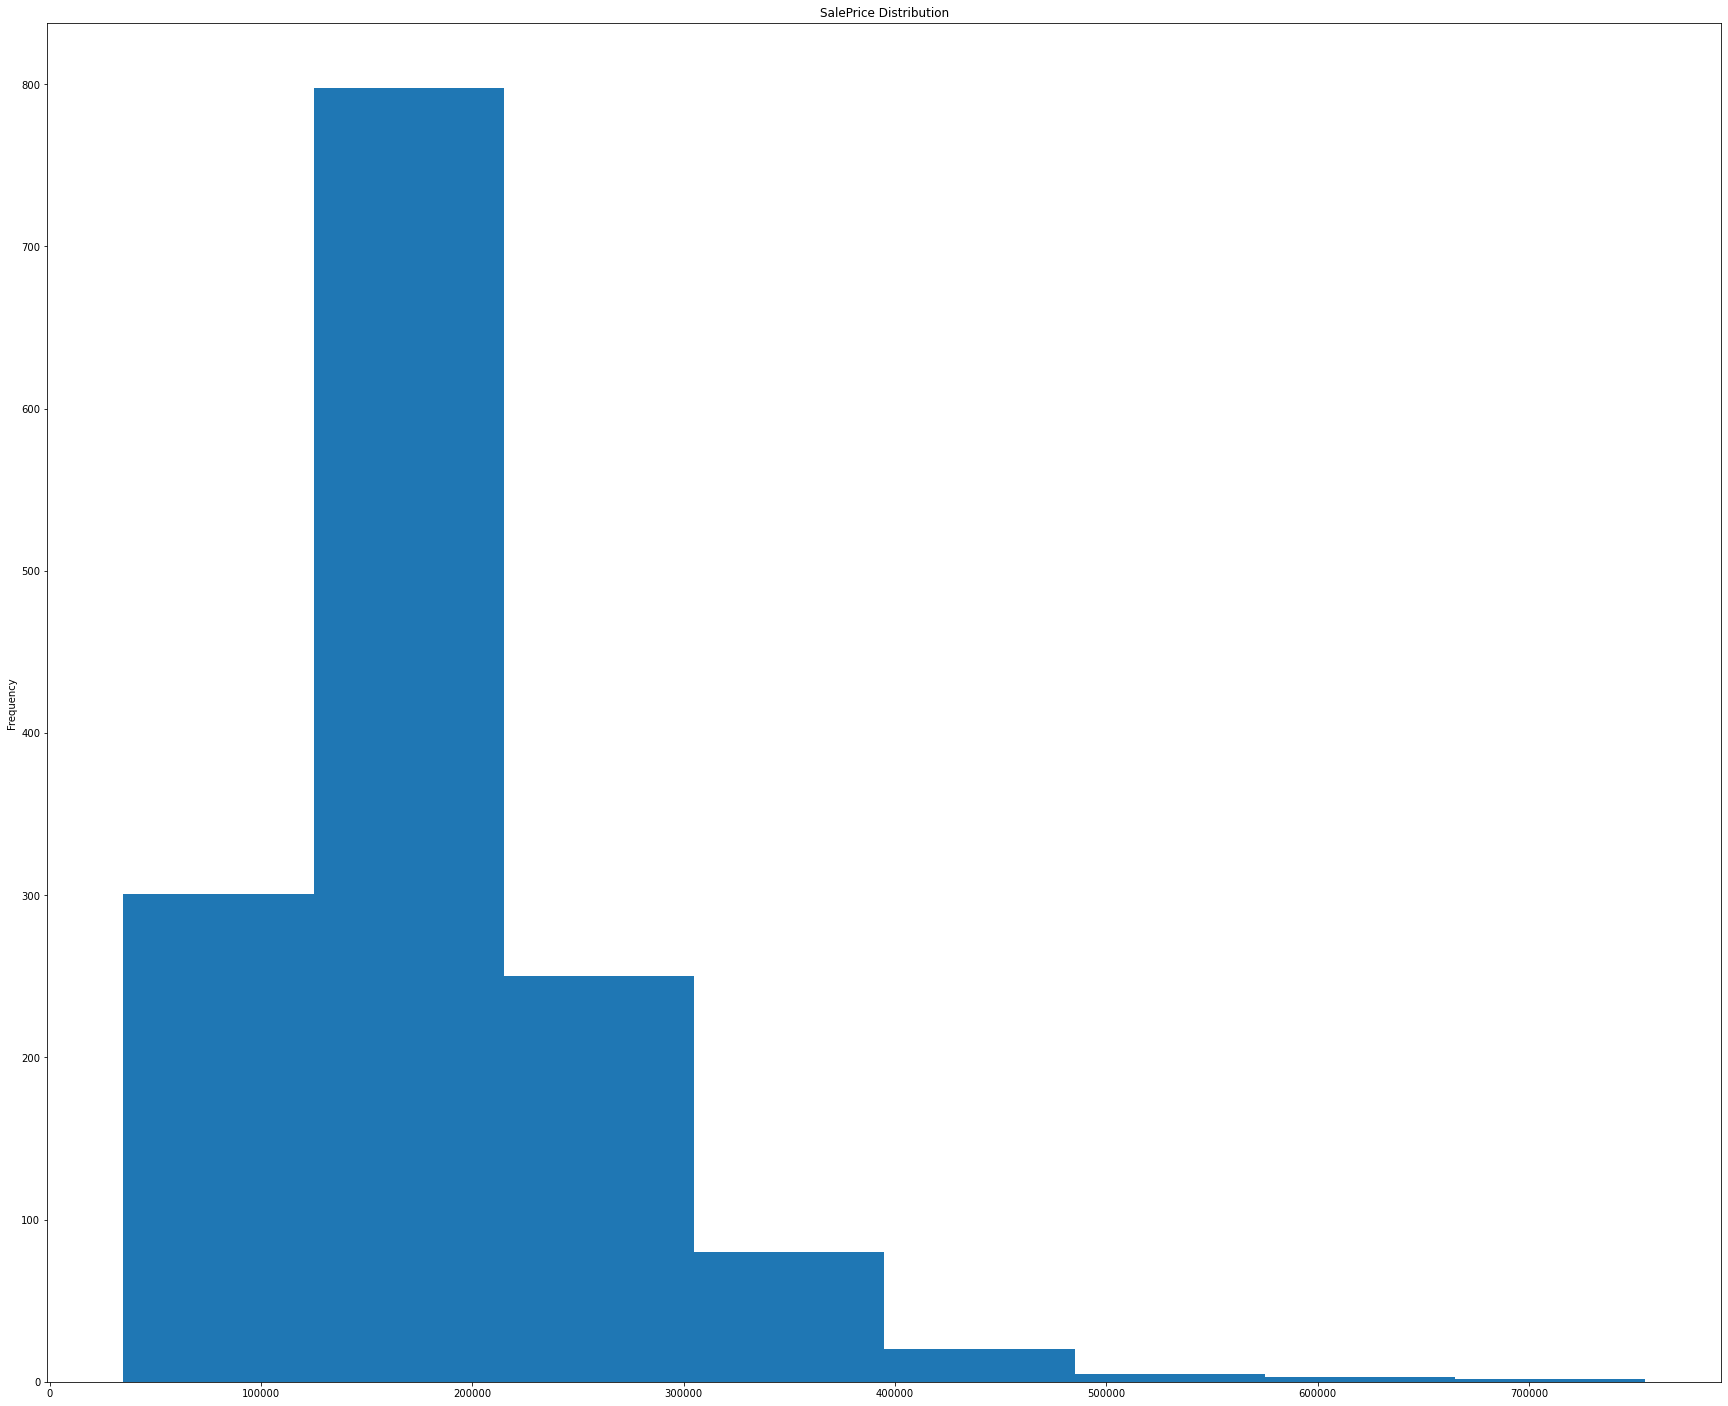

In [63]:
train_df['SalePrice'].plot(kind='hist', bins=8,
                           title='SalePrice Distribution')

The target variable distribution is right-skewed; however, since we use machine learning techniques, we do not need to consider statistical assumptions.

In [64]:
print("New train set shape: {}".format(train_df.shape))

New train set shape: (1459, 49)


The updated training dataset has 1459 instances, 48 features and 1 target variable.

In [65]:
print("New test set shape: {}".format(test_df.shape))

New test set shape: (1459, 48)


The updated training dataset has 1459 instances, 48 features.

### Data Preprocessing

#### Handle categorical variables

In [66]:
# train_df[cat_vars].info()
for x in cat_vars:
    cols = pd.get_dummies(train_df[x], prefix=x)
    train_df[cols.columns] = cols
    train_df.drop(x, axis = 1, inplace = True)

In [67]:
# test_df[cat_vars].info()
for x in cat_vars:
    cols = pd.get_dummies(test_df[x], prefix=x)
    test_df[cols.columns] = cols
    test_df.drop(x, axis = 1, inplace = True)

We use One Hot Encoding to transform categorical values.

In [68]:
# train_df[ord_vars].info()
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_df[ord_vars] = enc.fit_transform(train_df[ord_vars])
test_df[ord_vars] = enc.fit_transform(test_df[ord_vars])

We use OrdinalEncoder to transform ordinal values.

In [69]:
print("Train set shape (For modeling): {}".format(train_df.shape))

Train set shape (For modeling): (1459, 106)


After we finish the data preparation, the new training dataset is 106 features and 1459 instances.

In [70]:
print("Test set shape (For prediction): {}".format(test_df.shape))

Test set shape (For prediction): (1459, 105)


After we finish the data preparation, the new testing dataset is 106 features and 1459 instances. The testing set only gets 105 columns since there is no Saleprice value in the testing set.

#### Train test split

In [71]:
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice', axis = 1)
y = train_df.SalePrice
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)


In [72]:
print("Size of train set: {}   Size of test set: {}".format(X_train_org.shape[0], X_test_org.shape[0]))

Size of train set: 1094   Size of test set: 365


After we split the data, we get the training set of 1094 and the testing set of 365.

#### Data scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [74]:
test_pre = MinMaxScaler().fit_transform(test_df)

Since the features are not normally distributed, we use Min-Max scaler to transform the features.

## Build a Model

In this section, we use the following regression models with GridSearchCV to build the models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, LinearSVR, and SVM with kernels, Decision Tree Regressor. Additionally, the parameters of all models are optimized by cross-validated grid-search over a parameter grid.

Besides, this is regression analysis, so we use R-squared to choose our best model. 

### KNN Regressor

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Set param_grid
param_grid = {'n_neighbors': np.arange(1, 20, 1),
              'weights': ['uniform', 'distance']}

# Define the model
knn = KNeighborsRegressor()

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# Use GridSearch
gscv_knn = GridSearchCV(knn, param_grid, 
                        cv=cv,
                        scoring=scoring,
                        return_train_score=True
                       )

# Fit the model
gscv_knn.fit(X_train, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_knn.best_score_))


Best parameters: {'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation score: 0.61


The best hyper-parameters of KNN Regressor using Grid Search is {'n_neighbors': 17, 'weights': 'distance'}. We will use them to build the KNN Regressor model.

Text(0, 0.5, 'score')

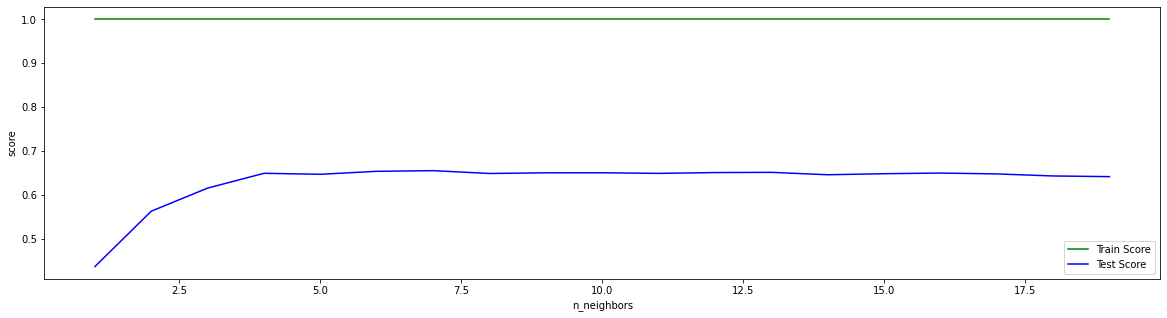

In [76]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(
        n_neighbors=k,weights=gscv_knn.best_params_['weights'])
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')

However, the line plot shows an overfitting problem since the train scores with any n_neighbors values are all 1.

In [77]:
results = pd.DataFrame(gscv_knn.cv_results_)

bestParamsRow = results.sort_values(
    ['rank_test_score'])[results['mean_train_score']!= 1].iloc[0]['params']

bestParamsRow

{'n_neighbors': 16, 'weights': 'uniform'}

We would want to avoid any overfitting. So we consider parameters that do not result in train score 1 and get the best out of the remaining iterations. The best hyper-parameters become {'n_neighbors': 16, 'weights': 'uniform'}.

Text(0, 0.5, 'score')

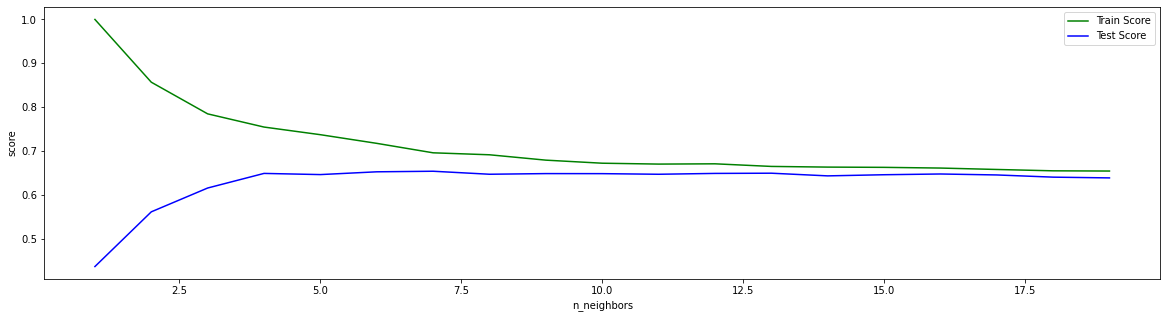

In [78]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(
        n_neighbors=k, weights=bestParamsRow['weights'])
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')

The line plot also shows that after n_neighbors is larger than 10, the train score and the test score are getting closer. This also explains why the best n_neighbors parameter is 16.

In [79]:
# set the best KNN
best_knn = KNeighborsRegressor(
    n_neighbors=bestParamsRow['n_neighbors'], 
    weights=bestParamsRow['weights'])

# fit the model
best_knn.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_knn.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_knn.score(X_test, y_test)))

# predict
y_pred_knn = best_knn.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_knn)
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_knn)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_knn)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE: {:.0f}'.format(RMSE))

knn_result = {'KNN':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
knn_result = pd.DataFrame(knn_result)  
#print(knn_result)


Train score: 0.66
Test score(R2): 0.65
MAE: 29344
MSE: 1991646082
RMSE: 44628


For KNN Regressor model, we receive the train score of 0.66 and the test score of 0.65.

#### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold

# set param_grid
param_grid = {'fit_intercept':[True,False], 
              'normalize':[True,False]}

# define the model
linreg = LinearRegression()

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# Use GridSearch
gscv_linreg = GridSearchCV(linreg, param_grid,
                           cv=cv,
                           scoring=scoring,
                           verbose=1, 
                           return_train_score=True
                          )

# Fit the model
gscv_linreg.fit(X_train, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_linreg.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_linreg.best_score_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.56


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


The best hyper-parameters of Linear Regression using Grid Search is {'fit_intercept': True, 'normalize': True}. We will use them to build the Linear Regression model.

In [81]:
# set best linear
best_linreg = LinearRegression(
    normalize=gscv_linreg.best_params_['normalize'],
    fit_intercept=gscv_linreg.best_params_['fit_intercept'])

# Fit the model
best_linreg.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_linreg.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_linreg.score(X_test, y_test)))

# predict
y_pred_linreg = best_linreg.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_linreg, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_linreg)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_linreg)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg))
print('RMSE: {:.0f}'.format(RMSE))

linreg_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
linreg_result = pd.DataFrame(linreg_result)  
#print(linreg_result)


Train score: 0.84
Test score(R2): 0.85
MAE: 21588
MSE: 850349606
RMSE: 29161


For Linear Regression model, we receive the train score of 0.84 and the test score of 0.85. The result of Linear Regression is better than that of KNN Regressor.

#### Polynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold

# poly_1
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# set param_grid
param_grid = {'fit_intercept':[True,False], 
              'normalize':[True,False]}

# define the model
polyreg = LinearRegression()

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# Use GridSearch
gscv_polyreg = GridSearchCV(polyreg, param_grid,
                           cv=cv,
                           scoring=scoring,
                           return_train_score=True
                          )

# Fit the model
gscv_polyreg.fit(X_train_poly, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_polyreg.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_polyreg.best_score_))


Best parameters: {'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.57


First, we take a 2-degree polynomial to build the model. The best hyper-parameters of Polynomial Regression using Grid Search is {'fit_intercept': True, 'normalize': False}. We will use them to build the Polynomial Regression model.

In [83]:
# set best linear
best_polyreg = LinearRegression(fit_intercept=True, normalize=False)

# Fit the model
best_polyreg.fit(X_train_poly, y_train)

# train and test score
print("Train score: {:.2f}".format(best_polyreg.score(X_train_poly, y_train)))
print("Test score(R2): {:.2f}".format(best_polyreg.score(X_test_poly, y_test)))

# predict
y_pred_polyreg = best_polyreg.predict(X_test_poly)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_polyreg, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_polyreg)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_polyreg)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_polyreg))
print('RMSE: {:.0f}'.format(RMSE))

polyreg_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
polyreg_result = pd.DataFrame(polyreg_result)  
#print(polyreg_result)


Train score: 1.00
Test score(R2): 0.62
MAE: 34256
MSE: 2127289992
RMSE: 46123


In [84]:
X_train_poly.shape

(1094, 5671)

However, we face a curse of dimensionality problem using the PolynomialFeatures function with degree = 2. Since the features are exceeding the rows, resulting in a training score of 1. To be more precise, we get 5671 columns and 1094 rows. To solve this issue, the only way is to reduce the degree value, which means we will get the same result as linear regression. 

#### Ridge Regression

In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# set param_grid
param_grid = {'alpha':[0.1, 1, 10, 100],
              'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]
             }

# define the model
ridge = Ridge(random_state=0)

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# define the grid search
gscv_ridge= GridSearchCV(ridge, param_grid, 
                         cv=cv,
                         scoring=scoring,
                         return_train_score=True)

# fit the grid search
gscv_ridge.fit(X,y)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_ridge.best_score_))


Best parameters: {'alpha': 0.1, 'normalize': True, 'tol': 1e-06}
Best cross-validation score: 0.81


The best hyper-parameters of Ridge Regression using Grid Search is {'alpha': 0.1, 'normalize': True, 'tol': 1e-06}. We will use them to build the Ridge Regression model.

In [86]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.1, 1, 10, 100]: 
    ridge = Ridge(alpha, 
                  normalize=gscv_ridge.best_params_['normalize'],
                  tol=gscv_ridge.best_params_['tol']
                 )
    ridge.fit(X_train, y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

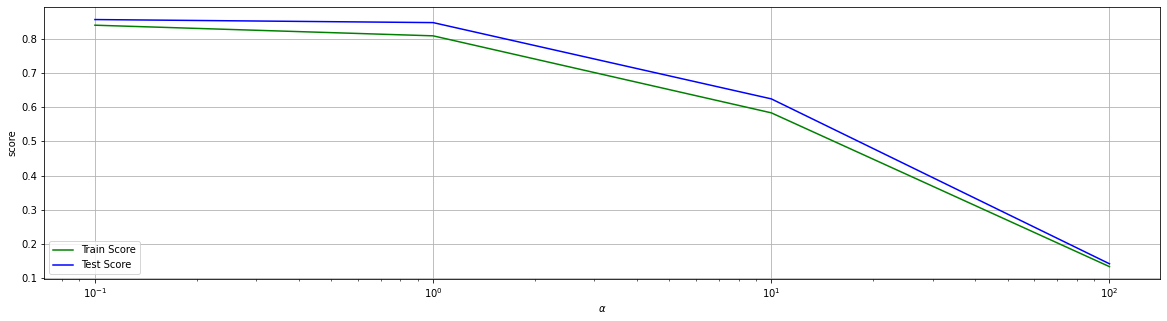

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('score')
plt.grid()

The line plot indicates that the training score and testing score get lower when the value of alpha increases. 

In [88]:
# define the best ridge model
best_ridge = Ridge(alpha=gscv_ridge.best_params_['alpha'],
                   normalize=gscv_ridge.best_params_['normalize'],
                  tol=gscv_ridge.best_params_['tol']
                  )

# fit the model
best_ridge.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_ridge.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_ridge.score(X_test, y_test)))

# predict
y_pred_ridge = best_ridge.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_ridge, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_ridge)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_ridge)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE: {:.0f}'.format(RMSE))

ridge_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
ridge_result = pd.DataFrame(ridge_result)  
#print(ridge_result)

Train score: 0.84
Test score(R2): 0.86
MAE: 20831
MSE: 814213935
RMSE: 28534


For Ridge Regression model, we receive the train score of 0.84 and the test score of 0.86.

#### Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

param_grid = {'alpha':[0.1, 1, 10, 100, 250, 500, 1000]}

# define the model
lasso = Lasso()

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# define the grid search
gscv_lasso= GridSearchCV(lasso, param_grid, 
                         cv=cv,
                         scoring=scoring,
                         return_train_score=True)

# fit the grid search
gscv_lasso.fit(X_train, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_lasso.best_score_))


Best parameters: {'alpha': 500}
Best cross-validation score: 0.77


The best hyper-parameters of Lasso Regression using Grid Search is {'alpha': 500}. We will use this hyperparameter to build the Lasso Regression model.

In [90]:
# define the best lasso model
best_lasso = Lasso(alpha=gscv_lasso.best_params_['alpha'])

# fit the model
best_lasso.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_lasso.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_lasso.score(X_test, y_test)))

# predict
y_pred_lasso = best_lasso.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_lasso, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_lasso)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_lasso)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE: {:.0f}'.format(RMSE))

lasso_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
lasso_result = pd.DataFrame(lasso_result)  
#print(lasso_result)


Train score: 0.81
Test score(R2): 0.83
R2: 0.83
MAE: 21686
MSE: 946517188
RMSE: 30766


For Lasso Regression model, we receive the train score of 0.81 and the test score of 0.83.

#### LinearSVR

In [91]:
from sklearn.svm import LinearSVR

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon':[0.1,0.2,0.5,0.3]}

# define the model
svr = LinearSVR(random_state=0)

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# define the grid search
gscv_svr= GridSearchCV(svr, param_grid, 
                       cv=cv,
                       scoring=scoring,
                       return_train_score=True)

# fit the grid search
gscv_svr.fit(X_train, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_svr.best_score_))


Best parameters: {'C': 100, 'epsilon': 0.3}
Best cross-validation score: 0.30


The best hyper-parameters of LinearSVR using Grid Search is {'C': 100, 'epsilon': 0.3}. We will use them to build the LinearSVR model.

In [92]:
# define the best svr model
best_svr = LinearSVR(C=gscv_svr.best_params_['C'],
              epsilon=gscv_svr.best_params_['epsilon'])

# fit the model
best_svr.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_svr.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_svr.score(X_test, y_test)))

# predict
y_pred_svr = best_svr.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_svr, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_svr)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_svr)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
print('RMSE: {:.0f}'.format(RMSE))

svr_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
svr_result = pd.DataFrame(svr_result)  
#print(svr_result)


Train score: 0.36
Test score(R2): 0.37
MAE: 35753
MSE: 3592001868
RMSE: 59933


For LinearSVR model, we only receive the train score of 0.36 and the test score of 0.37.

#### kernels SVM

In [93]:
from sklearn.svm import SVR

param_grid = {'kernel' : ('linear', 'poly', 'rbf'),
              'C' : [1,5,10],
              'degree' : [3,8],
              'coef0' : [0.01,10,0.5],
              'gamma' : ('auto','scale')},

# define the model
svr_kernal = SVR()

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# define the grid search
gscv_svr_kernal= GridSearchCV(svr_kernal, param_grid,
                              cv=cv,
                              scoring=scoring,
                              return_train_score=True)

# fit the grid search
gscv_svr_kernal.fit(X_train, y_train)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_svr_kernal.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_svr_kernal.best_score_))


Best parameters: {'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score: 0.68


The best hyper-parameters of kernels SVM using Grid Search is {'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly'}. We will use them to build the kernels SVM model.

In [94]:
# define the best svr model
best_svr_kernal = SVR(kernel=gscv_svr_kernal.best_params_['kernel'],
                      C=gscv_svr_kernal.best_params_['C'],
                      degree=gscv_svr_kernal.best_params_['degree'],
                      coef0=gscv_svr_kernal.best_params_['coef0'],
                      gamma=gscv_svr_kernal.best_params_['gamma'])

# fit the model
best_svr_kernal.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_svr_kernal.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_svr_kernal.score(X_test, y_test)))

# predict
y_pred_svr_kernal = best_svr_kernal.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_svr_kernal, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_svr_kernal)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_svr_kernal)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_kernal))
print('RMSE: {:.0f}'.format(RMSE))

svr_kernal_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
svr_kernal_result = pd.DataFrame(svr_kernal_result)  
#print(svr_result)


Train score: 1.00
Test score(R2): 0.78
MAE: 24794
MSE: 1219600027
RMSE: 34923


For kernels SVM model, we receive the training score of 1 and the test score of 0.78. This is reasonable because this model uses the PolynomialFeatures function with degree = 2, resulting in the overfitting problem.

#### Decison Tree Regressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [3, 5, 10],
              'max_features': [3, 4, 5]}

# define the model
dt = DecisionTreeRegressor(random_state=0)

# Define the cv
cv = KFold(n_splits=5,shuffle=True,random_state=0)

# Define the scoring
scoring = 'r2'

# define the grid search
gscv_dt = GridSearchCV(dt, param_grid,
                       cv=cv,
                       scoring=scoring,
                       return_train_score=True)

# fit the grid search
gscv_dt.fit(X, y)

# Print The value of best Hyperparameters
print("Best parameters: {}".format(gscv_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(gscv_dt.best_score_))


Best parameters: {'max_depth': 10, 'max_features': 5}
Best cross-validation score: 0.64


The best hyper-parameters of Decison Tree Regressor using Grid Search is {'max_depth': 10, 'max_features': 5}. We will use them to build the Decison Tree Regressor model.

In [96]:
# define the best dt model
best_dt = DecisionTreeRegressor(
    max_depth=gscv_dt.best_params_['max_depth'],
    max_features=gscv_dt.best_params_['max_features'],
    random_state=0)

# fit the model
best_dt.fit(X_train, y_train)

# train and test score
print("Train score: {:.2f}".format(best_dt.score(X_train, y_train)))
print("Test score(R2): {:.2f}".format(best_dt.score(X_test, y_test)))

# predict
y_pred_dt = best_dt.predict(X_test)

# evaluate
from sklearn.metrics import r2_score
from sklearn import metrics

R2 = r2_score(y_test, y_pred_dt, multioutput='variance_weighted')
#print("R2: {:.2f}".format(R2)) 

MAE = metrics.mean_absolute_error(y_test, y_pred_dt)
print('MAE: {:.0f}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred_dt)
print('MSE: {:.0f}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE: {:.0f}'.format(RMSE))

dt_result = {'R2':[R2], 'MAE:':[MAE], 'MSE:':[MSE], 'RMSE:':[RMSE]}
dt_result = pd.DataFrame(dt_result)  
#print(dt_result)


Train score: 0.92
Test score(R2): 0.57
MAE: 32341
MSE: 2440097061
RMSE: 49397


For Decison Tree Regressor model, we receive the train score of 0.92 and the test score of only 0.57.

## Model Selection

To find the best regression model, we choose $R^2$ and RMSE as our evaluation indicators. The higher value of R square, the better. The lower value of RMSE implies higher accuracy of a regression model. Additionally, we prefer the difference between train scores and test scores to be as small as possible.

Since the Linear Regression, Ridge Regression, and Lasso Regression all got high training and testing scores, we consider the RMSE indicator. The results show that the Ridge Regression has the lowest RMSE of 28534. Therefore, we choose Ridge Regression to be our best model. The train score of Ridge Regression is 0.84 and the test score of Ridge Regression is 0.86.

The various scores we get on running the Best Ridge Regression on the training dataset are: 

Train score: 0.84 

Test score(R2): 0.86

MAE: 20831

MSE: 814213935

RMSE: 28534

## Prediction

We Will now use this model to predict a new test data set. (which was already preprocessed and saved in 'test_pre')

In [97]:
# fit the model
best_ridge.fit(X, y)

# predict
predictions = best_ridge.predict(test_pre)

We train the model on the entire dataset using Ridge regression and apply it on the test_df to predict 1459 house prices.

In [107]:
SalePrice_prediction = pd.DataFrame(columns=['Id', 'SalePrice'])
SalePrice_prediction['Id'] = test_df_forPred['Id']
SalePrice_prediction['SalePrice'] = predictions
SalePrice_prediction.head(10)

Id     SalePrice
0  1461  30198.804256
1  1462  32801.468425
2  1463  33540.227975
3  1464  31347.249621
4  1465  53900.030728
5  1466  37164.539634
6  1467  39550.960935
7  1468  36255.536782
8  1469  36210.122500
9  1470  29586.179586

In [109]:
SalePrice_prediction.to_csv('SalePrice_prediction.csv', index=False)

The table shows the sale prices of 10 IDs using the best model. We also save the entire sale prices prediction into a csv file 'SalePrice_prediction'.
